In [1]:
import pandas as pd
import numpy as np

#directory = '/content/drive/My Drive/progetto stat learning/tabelle'
directory = 'C:\\Users\\Admin\\Documents\\University\\DataScience\\Statistical_data_analysis\\progetto_esame_modB\\SerieA\\FIFA_tables_csv'
file = 'PCAdf.csv'
df = pd.read_csv(f'{directory}/{file}')

print(df.shape)
df.head(5)

(1535, 22)


,season,Player,Squad,player_positions,Incisività offensiva,Individualismo (palla in movimento),Capacità di finalizzazione,Inefficacia del tiro,Gioco offensivo con palla in movimento,Altruismo,...,Passaggio propositivo e nell’ultimo 1/3 di campo,Gioco con palla in movimento,Inefficacia del passaggio,Alta propositività nella metà campo avversaria,Avanzamento e dribbling aggressivo/superfluo,shooting,passing,dribbling,defending,Overall_index
0,2017/18,Rolando Aarons,Hellas Verona,"CM, RB",-3.216049,-0.246008,-0.913542,0.782657,-0.116866,0.022182,...,-4.541649,0.677815,-0.132570,-2.737905,1.334183,62,65,76,32,71
1,2017/18,Ignazio Abate,Milan,RB,-0.875025,0.556874,0.245906,-2.164812,0.140740,0.614803,...,0.849643,-0.353673,-1.366043,-1.146317,-1.058065,52,71,77,74,78
2,2017/18,Francesco Acerbi,Sassuolo,CB,-2.289905,-0.327316,-1.177773,0.452532,-0.309609,-0.377837,...,7.165414,-4.833849,-0.319769,3.667118,-4.938407,50,58,58,85,82
3,2017/18,Afriyie Acquah,Torino,CM,-2.050224,0.832823,-0.250295,-0.734579,0.187313,-0.420015,...,-2.337978,-1.145144,0.598671,-0.992824,-0.027114,63,68,75,72,74
4,2017/18,Claud Adjapong,Sassuolo,"RB, RM",-1.047935,-0.236146,-0.614187,0.671591,-1.050796,-0.243246,...,-1.590082,0.304906,-1.638060,-0.352510,0.380957,51,60,72,66,69


In [2]:
df.describe(include='all')

,season,Player,Squad,player_positions,Incisività offensiva,Individualismo (palla in movimento),Capacità di finalizzazione,Inefficacia del tiro,Gioco offensivo con palla in movimento,Altruismo,...,Passaggio propositivo e nell’ultimo 1/3 di campo,Gioco con palla in movimento,Inefficacia del passaggio,Alta propositività nella metà campo avversaria,Avanzamento e dribbling aggressivo/superfluo,shooting,passing,dribbling,defending,Overall_index
count,1535,1535,1535,1535,1535.000000,1535.000000,1535.000000,1535.000000,1535.000000,1535.000000,...,1535.000000,1535.000000,1535.000000,1535.000000,1535.000000,1535.000000,1535.000000,1535.000000,1535.000000,1535.000000
unique,3,820,25,175,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2019/20,Jasmin Kurtic,Genoa,CB,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,516,5,91,261,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,0.062967,0.003625,-0.011126,-0.035999,-0.001132,0.005275,...,0.127381,-0.018162,0.009988,0.090581,-0.010860,58.082736,63.542020,69.179805,58.344625,73.816938
std,NaN,NaN,NaN,NaN,3.772306,1.873516,1.399351,1.413717,1.267836,1.100310,...,5.019814,2.299925,1.671925,3.452966,2.076674,15.349014,11.591511,10.341382,18.907320,6.122477
min,NaN,NaN,NaN,NaN,-3.494891,-10.037058,-7.527177,-7.837320,-6.652133,-4.210969,...,-6.396342,-8.677417,-6.568135,-4.513603,-7.354910,15.000000,27.000000,27.000000,17.000000,52.000000
25%,NaN,NaN,NaN,NaN,-2.510310,-0.777850,-0.800688,-0.734484,-0.470982,-0.510733,...,-4.105727,-1.107710,-0.613907,-2.826860,-1.077482,47.000000,56.000000,63.000000,40.000000,70.000000
50%,NaN,NaN,NaN,NaN,-1.196011,-0.201446,-0.256012,0.214902,-0.142904,0.005051,...,-1.145351,0.184684,0.190554,-0.591352,0.192401,62.000000,65.000000,71.000000,66.000000,74.000000
75%,NaN,NaN,NaN,NaN,1.387817,0.806823,0.548477,0.678018,0.353454,0.374801,...,3.335422,0.899887,0.823511,2.331755,1.131263,70.000000,72.000000,77.000000,73.000000,78.000000


In [64]:
#pd.set_option('display.float_format', lambda x: '%.2f' % x)
df.describe(include='all')
tmp = df.describe(include='all')
tmp.to_csv('summary_players_pca.csv')

In [3]:
shape = df.shape
#season = df.columns[0]
#player = df.columns[1]
#team = df.columns[2]
features = list(df.columns[4:17])#(shape[1]-1)])

# Separating out the features
x = df.loc[:, features].values
#print(np.mean(x, axis=0))
#print(np.std(x, axis=0))

y = df.loc[:, 'Overall_index'].values

In [12]:
#CORRELAZIONE CON OVERALL INDEX
corr_df = df.iloc[:,3:17]
corr_df['Overall_index'] = df.loc[:, 'Overall_index'].values
corr_df = corr_df.corr()
corr_df.iloc[:,-1]

Incisività offensiva                                0.441957
Individualismo (palla in movimento)                -0.034535
Capacità di finalizzazione                         -0.071431
Inefficacia del tiro                               -0.135047
Gioco offensivo con palla in movimento             -0.015860
Altruismo                                           0.025722
Supremazia atletica / giocate aggressive            0.322031
Pressing efficace in zona difensiva                 0.052580
Passaggio propositivo e nell’ultimo 1/3 di campo    0.462485
Gioco con palla in movimento                       -0.037283
Inefficacia del passaggio                           0.162884
Alta propositività nella metà campo avversaria      0.479893
Avanzamento e dribbling aggressivo/superfluo       -0.053047
Overall_index                                       1.000000
Name: Overall_index, dtype: float64

In [13]:
import matplotlib.pyplot as plt

#corr_df = df.iloc[:,3:]

#https://stackoverflow.com/questions/29432629/plot-correlation-matrix-using-pandas
#corr = corr_df.corr()
corr_df.style.background_gradient(cmap='coolwarm', axis=None)\
    .set_properties(**{'max-width': '10px', 'font-size': '8pt'})\
    .set_precision(2)

## calculating and plotting the correlation coeff's using a seaborn heatmap
#corr = corr_df.corr()
#sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='coolwarm')

#You can use pyplot.matshow() from matplotlib
#f = plt.figure(figsize=(10, 10))
#plt.matshow(corr_df.corr(), fignum=f.number)
#plt.xticks(range(corr_df.shape[1]), corr_df.columns, fontsize=8, rotation=90)
#plt.yticks(range(corr_df.shape[1]), corr_df.columns, fontsize=8)
#cb = plt.colorbar()
#cb.ax.tick_params(labelsize=14)
##plt.title('Correlation Matrix', fontsize=16)
#plt.show()

#
#from string import ascii_letters
#import seaborn as sns
#import matplotlib.pyplot as plt
#sns.set(style="white")
## Generate a mask for the upper triangle
#mask = np.triu(np.ones_like(corr_matrix, dtype=np.bool))
## Set up the matplotlib figure
#f, ax = plt.subplots(figsize=(11, 9))
## Generate a custom diverging colormap
#cmap = sns.diverging_palette(220, 10, as_cmap=True)
## Draw the heatmap with the mask and correct aspect ratio
#sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
#            square=True, linewidths=.5, cbar_kws={"shrink": .5})

,Incisività offensiva,Individualismo (palla in movimento),Capacità di finalizzazione,Inefficacia del tiro,Gioco offensivo con palla in movimento,Altruismo,Supremazia atletica / giocate aggressive,Pressing efficace in zona difensiva,Passaggio propositivo e nell’ultimo 1/3 di campo,Gioco con palla in movimento,Inefficacia del passaggio,Alta propositività nella metà campo avversaria,Avanzamento e dribbling aggressivo/superfluo,Overall_index
Incisività offensiva,1,-0.00079,-0.014,0.0085,-0.0019,0.00094,0.36,0.044,0.53,0.54,0.09,0.7,0.52,0.44
Individualismo (palla in movimento),-0.00079,1,0.0072,0.0017,-0.00034,0.012,-0.25,-0.078,-0.43,-0.27,-0.15,-0.27,0.16,-0.035
Capacità di finalizzazione,-0.014,0.0072,1,-0.098,-0.034,0.035,-0.32,-0.074,-0.28,0.16,0.082,-0.26,0.19,-0.071
Inefficacia del tiro,0.0085,0.0017,-0.098,1,-0.022,0.034,-0.28,-0.071,-0.28,0.15,-0.022,-0.23,0.24,-0.14
Gioco offensivo con palla in movimento,-0.0019,-0.00034,-0.034,-0.022,1,0.014,-0.052,0.0042,0.071,0.19,0.34,-0.12,-0.15,-0.016
Altruismo,0.00094,0.012,0.035,0.034,0.014,1,-0.062,0.014,-0.048,-0.07,-0.023,-0.092,-0.095,0.026
Supremazia atletica / giocate aggressive,0.36,-0.25,-0.32,-0.28,-0.052,-0.062,1,-0.009,0.82,-0.17,-0.11,0.79,-0.29,0.32
Pressing efficace in zona difensiva,0.044,-0.078,-0.074,-0.071,0.0042,0.014,-0.009,1,0.2,-0.03,0.044,0.16,-0.12,0.053
Passaggio propositivo e nell’ultimo 1/3 di campo,0.53,-0.43,-0.28,-0.28,0.071,-0.048,0.82,0.2,1,0.0098,-0.0078,0.91,-0.28,0.46
Gioco con palla in movimento,0.54,-0.27,0.16,0.15,0.19,-0.07,-0.17,-0.03,0.0098,1,0.014,0.082,0.74,-0.037


In [11]:
import imgkit

corr = corr_df#.corr()
html_string = corr.style.background_gradient(cmap='coolwarm', axis=None)\
                    .set_properties(**{'max-width': '10px', 'font-size': '8pt'})\
                    .set_precision(2)\
                    .render()

Html_file= open("corr_matr.html","w")
Html_file.write(html_string)
Html_file.close()

#imgkit.from_string(html_string, 'corr_matr.png')

<function matplotlib.pyplot.show(*args, **kw)>

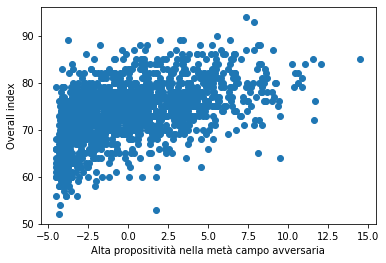

In [22]:
#plot
import matplotlib.pyplot as plt

n_feature = 11
plt.scatter(x[:,n_feature],y)
plt.xlabel(features[n_feature])
plt.ylabel('Overall index')

plt.show

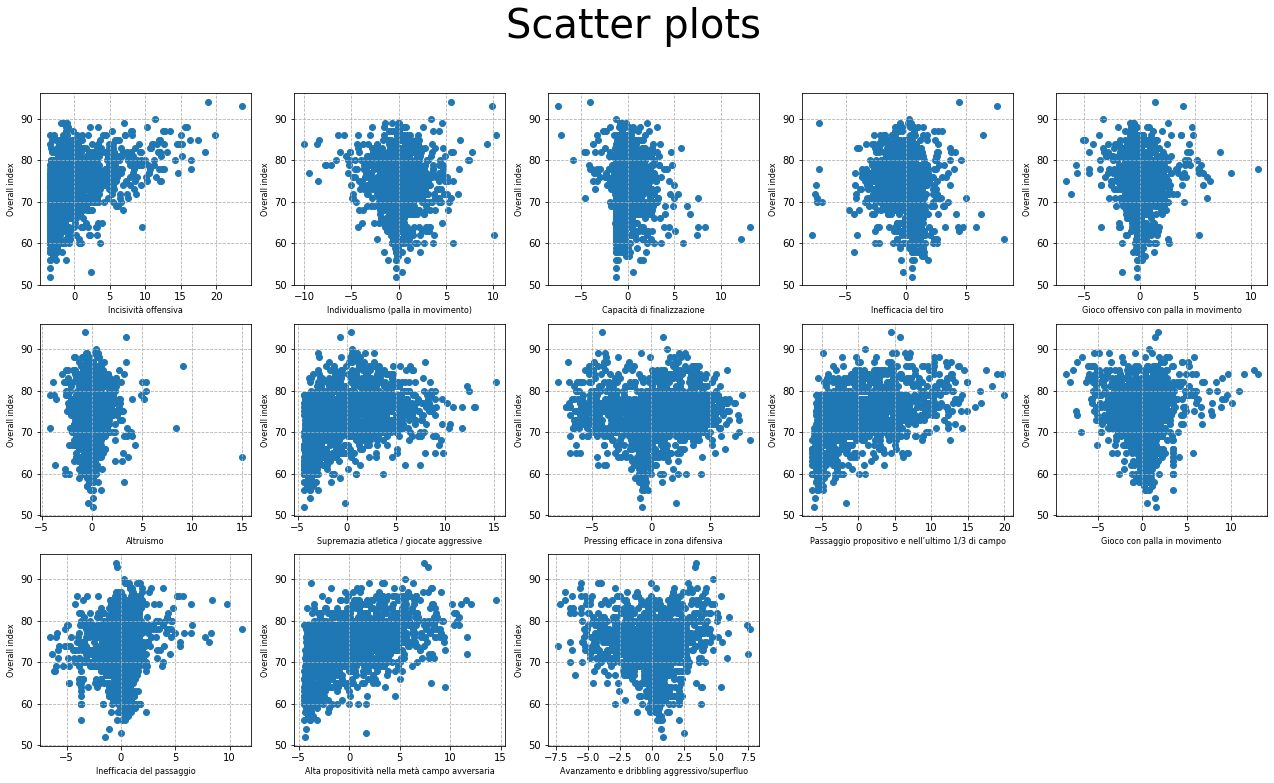

In [23]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

def plot_feature(axis,x,y,feature,i,j,fig): 
    axis = fig.add_subplot(gs[i,j])
    axis.scatter(x,y)
    axis.grid(linestyle='--')
    axis.set_xlabel(f'{feature}', size=8)
    axis.set_ylabel('Overall index', size=8)

    #axis.set_title(f'{frst_pc} vs. {scnd_pc}')
    

#n_feature = 12
#plt.scatter(x[:,n_feature],y)
#plt.xlabel(features[n_feature])
#plt.ylabel('Overall index')

fig = plt.figure(figsize=(22,12))
plt.axis('off')
fig.suptitle('Scatter plots',size=40)

n_rows = 3
n_columns = 5
gs=GridSpec(n_rows,n_columns) # 3 rows, 5 columns

n = 0
for i in range(n_rows):
    for j in range(n_columns):
        n_feature = n
        plot_feature(f'ax{n}',x[:,n_feature],y,features[n_feature],i,j,fig)
        n += 1
        if n == len(features):
            break

plt.show()

# LINEAR REGRESSION MODELS

In [24]:
#multiple regression model including all features
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(x, y)
# The coefficients
print('Coefficients: \n', reg.coef_)
# The intercept
print('Intercept: \n', reg.intercept_)
# The score
print('Score: \n', reg.score(x, y))

Coefficients: 
 [ 0.81958256  0.11574048  0.00503119 -0.20048482 -0.37123332  0.02504987
 -0.48317281 -0.16413729  0.94281012 -1.02069294  0.45549299 -0.58377229
  0.30128982]
Intercept: 
 73.71509079055656
Score: 
 0.367963275459796


In [25]:
# SST = SSR + SSE
#https://stackoverflow.com/questions/42033720/python-sklearn-multiple-linear-regression-display-r-squared

model = LinearRegression()
model.fit(x,y)

# compute with formulas from the theory
yhat = model.predict(x)
SS_Residual = sum((y-yhat)**2)       
SS_Total = sum((y-np.mean(y))**2)     
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-x.shape[1]-1)
print(f"R^2: {r_squared:.3f},\nR^2_adj: {adjusted_r_squared:.3f}")

# compute with sklearn linear_model, although could not find any function to compute adjusted-r-square directly from documentation
#print(model.score(x, y), 1 - (1-model.score(x, y))*(len(y)-1)/(len(y)-x.shape[1]-1))

R^2: 0.368,
R^2_adj: 0.363


In [26]:
#https://stackoverflow.com/questions/44495667/calculate-p-value-in-sklearn-using-python
#pip install regressors
from regressors import stats

#stats.adj_r2_score(reg, x, y)

# To calculate the p-values of beta coefficients: 
print("coef_pval:\n", stats.coef_pval(reg, x, y))
# to print summary table:
print("\n=========== SUMMARY ===========")
xlabels = features
stats.summary(reg, x, y, xlabels)

coef_pval:
 [0.00000000e+00 0.00000000e+00 3.07486662e-01 9.59499325e-01
 4.33836762e-02 4.59987784e-03 8.32604922e-01 1.23054900e-11
 3.00339228e-04 0.00000000e+00 2.22044605e-15 3.69954797e-07
 2.15187871e-04 7.45809698e-02]

=========== SUMMARY ===========
Residuals:
     Min       1Q   Median       3Q      Max
 64.1561  71.2371  72.9911  75.5821  91.8181


Coefficients:
                                                   Estimate  Std. Error   t value   p value
_intercept                                        73.715091    0.124276  593.1581  0.000000
Incisività offensiva                               0.819583    0.081104   10.1053  0.000000
Individualismo (palla in movimento)                0.115740    0.113377    1.0208  0.307487
Capacità di finalizzazione                         0.005031    0.099058    0.0508  0.959499
Inefficacia del tiro                              -0.200485    0.099168   -2.0217  0.043384
Gioco offensivo con palla in movimento            -0.371233    0.130809

### LASSO

In [27]:
from sklearn.linear_model import Lasso

reg_lasso = Lasso(alpha=0.1)
reg_lasso.fit(x,y)

# The coefficients
print('Coefficients: \n', reg_lasso.coef_)
# The intercept
print('Intercept: \n', reg_lasso.intercept_)
#R^2
print(f"R^2: {reg_lasso.score(x, y):.3f},\nR^2_adj: {1 - (1-reg_lasso.score(x, y))*(len(y)-1)/(len(y)-x.shape[1]-1):.3f}")

Coefficients: 
 [ 0.80661858  0.          0.         -0.14966416 -0.12822677  0.
 -0.42878749 -0.13336069  0.56281538 -0.87726159  0.35726388 -0.11886339
 -0.        ]
Intercept: 
 73.71986867575421
R^2: 0.364,
R^2_adj: 0.359


In [28]:
# To calculate the p-values of beta coefficients: 
print("coef_pval:\n", stats.coef_pval(reg_lasso, x, y))
# to print summary table:
print("\n=========== SUMMARY ===========")
xlabels = features
stats.summary(reg_lasso, x, y, xlabels)

coef_pval:
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 1.00000000e+00
 1.32659720e-01 3.28623787e-01 1.00000000e+00 1.91615146e-09
 3.38786118e-03 2.33850272e-08 9.17221854e-12 6.84754761e-05
 4.51614077e-01 1.00000000e+00]

=========== SUMMARY ===========
Residuals:
     Min       1Q   Median       3Q      Max
 65.1824  71.2601  73.0489  75.6519  92.2561


Coefficients:
                                                   Estimate  Std. Error   t value   p value
_intercept                                        73.719869    0.124664  591.3474  0.000000
Incisività offensiva                               0.806619    0.081358    9.9145  0.000000
Individualismo (palla in movimento)                0.000000    0.113731    0.0000  1.000000
Capacità di finalizzazione                         0.000000    0.099368    0.0000  1.000000
Inefficacia del tiro                              -0.149664    0.099478   -1.5045  0.132660
Gioco offensivo con palla in movimento            -0.128227    0.131218

In [50]:
from sklearn.linear_model import LassoCV

values = 10**np.linspace(0,-2,200)*0.5

reg_lasso_CV = LassoCV(cv=5, alphas=values).fit(x, y)
reg_lasso_CV.score(x, y)

0.3665493732932452

In [51]:
reg_lasso_CV.alphas_

array([0.5       , 0.48856208, 0.47738581, 0.4664652 , 0.45579441,
       0.44536773, 0.43517957, 0.42522447, 0.4154971 , 0.40599225,
       0.39670483, 0.38762987, 0.37876251, 0.370098  , 0.36163169,
       0.35335906, 0.34527568, 0.3373772 , 0.32965941, 0.32211818,
       0.31474945, 0.30754929, 0.30051384, 0.29363933, 0.28692208,
       0.2803585 , 0.27394506, 0.26767833, 0.26155497, 0.25557167,
       0.24972526, 0.24401258, 0.23843058, 0.23297628, 0.22764675,
       0.22243914, 0.21735066, 0.21237858, 0.20752024, 0.20277304,
       0.19813443, 0.19360194, 0.18917313, 0.18484564, 0.18061713,
       0.17648537, 0.17244811, 0.16850322, 0.16464856, 0.16088209,
       0.15720177, 0.15360565, 0.15009179, 0.14665831, 0.14330338,
       0.14002519, 0.136822  , 0.13369208, 0.13063376, 0.1276454 ,
       0.12472541, 0.12187221, 0.11908428, 0.11636012, 0.11369829,
       0.11109734, 0.1085559 , 0.10607259, 0.10364609, 0.1012751 ,
       0.09895834, 0.09669459, 0.09448262, 0.09232125, 0.09020

In [52]:
reg_lasso_CV.alpha_

0.04301732208342252

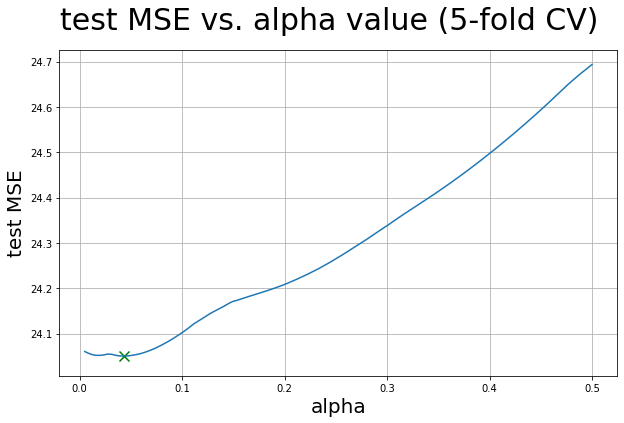

In [53]:
test_mse = np.mean(reg_lasso_CV.mse_path_, axis=1)

min_alpha = reg_lasso_CV.alpha_
min_test_mse = np.min(test_mse)

# Plotting
fig = plt.figure(figsize=(10,6))
fig.suptitle('test MSE vs. alpha value (5-fold CV)', fontsize=30)
#plt.title()
plt.xlabel('alpha', fontsize=20)
plt.ylabel('test MSE', fontsize=20)
#plt.hlines(y=0.815,xmin=0,xmax=5.0,colors='red',linestyles='dashed')
plt.plot(reg_lasso_CV.alphas_, test_mse)
plt.grid(True)
plt.scatter(min_alpha, min_test_mse, s=100, c='green', marker='x')
#plt.scatter(alpha_val, score_val)

In [54]:
#https://scikit-learn.org/stable/modules/cross_validation.html
from sklearn.model_selection import cross_val_score

#values = np.linspace(0,2,500)
values = 10**np.linspace(0,-2,200)*0.5
results = []
for alpha in values:
    #print(f'Alpha: {alpha}')
    reg_lasso = Lasso(alpha=alpha)
    scores = cross_val_score(reg_lasso, x, y, cv=5)
    score = np.sum(scores)/scores.shape
    results.append((alpha,score))

In [55]:
sorted_by_score = sorted(results, key=lambda tup: tup[1])
max_score = sorted_by_score[-1][1]
max_alpha = sorted_by_score[-1][0]
print(sorted_by_score[-1])

(0.044024417908217324, array([0.35482661]))


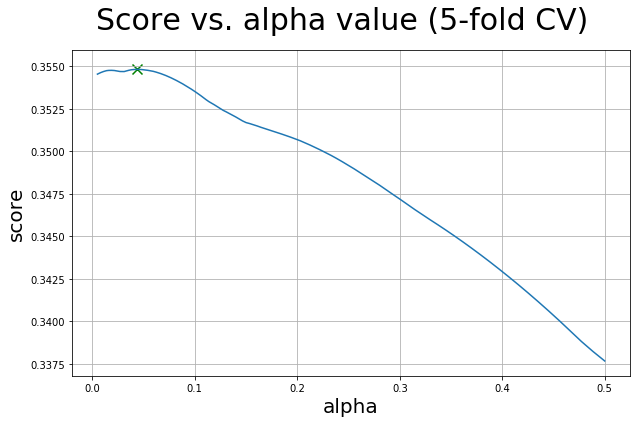

In [56]:
alpha_val = [couple[0] for couple in results]
score_val = [couple[1] for couple in results]

# Plotting
fig = plt.figure(figsize=(10,6))
fig.suptitle('Score vs. alpha value (5-fold CV)', fontsize=30)
#plt.title()
plt.xlabel('alpha', fontsize=20)
plt.ylabel('score', fontsize=20)
#plt.hlines(y=0.815,xmin=0,xmax=5.0,colors='red',linestyles='dashed')
plt.plot(alpha_val, score_val)
plt.grid(True)
plt.scatter(max_alpha, max_score, s=100, c='green', marker='x')
#plt.scatter(alpha_val, score_val)

In [59]:
from sklearn.linear_model import Lasso

reg_lasso = Lasso(alpha=0.043)
reg_lasso.fit(x,y)

# The coefficients
print('Coefficients: \n', reg_lasso.coef_)
# The intercept
print('Intercept: \n', reg_lasso.intercept_)
#R^2
print(f"R^2: {reg_lasso.score(x, y):.3f},\nR^2_adj: {1 - (1-reg_lasso.score(x, y))*(len(y)-1)/(len(y)-x.shape[1]-1):.3f}")

from regressors import stats

# To calculate the p-values of beta coefficients: 
print("coef_pval:\n", stats.coef_pval(reg_lasso, x, y))
# to print summary table:
print("\n=========== SUMMARY ===========")
xlabels = features
stats.summary(reg_lasso, x, y, xlabels)

Coefficients: 
 [ 0.8393028   0.06006412  0.         -0.17607526 -0.27326757  0.
 -0.45587754 -0.15057023  0.6949678  -0.88584112  0.39886443 -0.29955766
  0.01680993]
Intercept: 
 73.71826435225591
R^2: 0.367,
R^2_adj: 0.361
coef_pval:
 [0.00000000e+00 0.00000000e+00 5.96754329e-01 1.00000000e+00
 7.63366158e-02 3.70781583e-02 1.00000000e+00 1.63811187e-10
 9.20927824e-04 5.51358958e-12 5.26600985e-12 8.53985863e-06
 5.74493550e-02 9.20803626e-01]

=========== SUMMARY ===========
Residuals:
     Min       1Q   Median       3Q      Max
 65.0076  71.2697  73.0244  75.5838  92.2266


Coefficients:
                                                   Estimate  Std. Error   t value   p value
_intercept                                        73.718264    0.124414  592.5218  0.000000
Incisività offensiva                               0.839303    0.081195   10.3369  0.000000
Individualismo (palla in movimento)                0.060064    0.113503    0.5292  0.596754
Capacità di finalizzazione   

### RIDGE

In [60]:
from sklearn.linear_model import Ridge

reg_ridge = Ridge(alpha=0.1)
reg_ridge.fit(x,y)

# The coefficients
print('Coefficients: \n', reg_ridge.coef_)
# The intercept
print('Intercept: \n', reg_ridge.intercept_)
#R^2
print(f"R^2: {reg_ridge.score(x, y):.3f},\nR^2_adj: {1 - (1-reg_ridge.score(x, y))*(len(y)-1)/(len(y)-x.shape[1]-1):.3f}")

Coefficients: 
 [ 0.81953726  0.11577183  0.00505319 -0.20045317 -0.37119773  0.02507076
 -0.48315147 -0.1641333   0.94260584 -1.02048901  0.4554863  -0.58347846
  0.30102316]
Intercept: 
 73.7150931888464
R^2: 0.368,
R^2_adj: 0.363


In [61]:
# To calculate the p-values of beta coefficients: 
print("coef_pval:\n", stats.coef_pval(reg_ridge, x, y))
# to print summary table:
print("\n=========== SUMMARY ===========")
xlabels = features
stats.summary(reg_ridge, x, y, xlabels)

coef_pval:
 [0.00000000e+00 0.00000000e+00 3.07355719e-01 9.59322434e-01
 4.34167134e-02 4.60377870e-03 8.32467396e-01 1.23308030e-11
 3.00440655e-04 0.00000000e+00 2.22044605e-15 3.70099048e-07
 2.16765811e-04 7.48379343e-02]

=========== SUMMARY ===========
Residuals:
     Min       1Q  Median       3Q      Max
 64.1569  71.2371  72.991  75.5821  91.8179


Coefficients:
                                                   Estimate  Std. Error   t value   p value
_intercept                                        73.715093    0.124276  593.1581  0.000000
Incisività offensiva                               0.819537    0.081104   10.1047  0.000000
Individualismo (palla in movimento)                0.115772    0.113377    1.0211  0.307356
Capacità di finalizzazione                         0.005053    0.099058    0.0510  0.959322
Inefficacia del tiro                              -0.200453    0.099168   -2.0214  0.043417
Gioco offensivo con palla in movimento            -0.371198    0.130809  

In [65]:
from sklearn.linear_model import RidgeCV

alphas=np.arange(0.1,100.0)

reg_ridge_CV = RidgeCV(alphas=alphas,cv=5).fit(x, y)
reg_ridge_CV.score(x, y)

0.3678274977513027

In [66]:
reg_ridge_CV.alpha_

37.1

(37.1, array([0.35456464]))


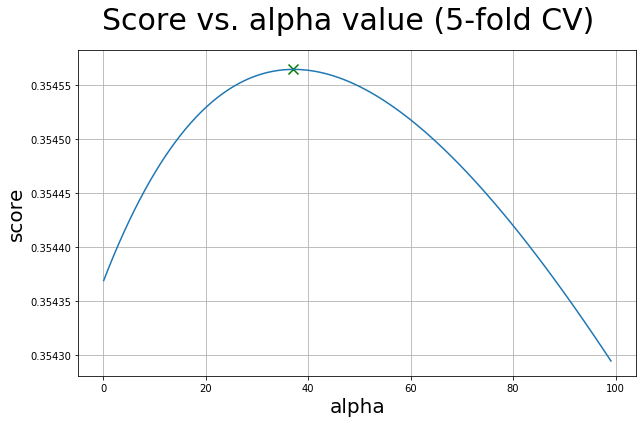

In [67]:
#values = np.linspace(0,200,2000)
#values = 10**np.linspace(2.5,-2,400)*0.5
values = np.arange(0.1,100.0)
results = []
for alpha in values:
    #print(f'Alpha: {alpha}')
    reg_ridge = Ridge(alpha=alpha)
    scores = cross_val_score(reg_ridge, x, y, cv=5)
    score = np.sum(scores)/scores.shape
    results.append((alpha,score))
#print(results)
sorted_by_score = sorted(results, key=lambda tup: tup[1])
max_score = sorted_by_score[-1][1]
max_alpha = sorted_by_score[-1][0]
print(sorted_by_score[-1])

alpha_val = [couple[0] for couple in results]
score_val = [couple[1] for couple in results]

# Plotting
fig = plt.figure(figsize=(10,6))
fig.suptitle('Score vs. alpha value (5-fold CV)', fontsize=30)
#plt.title()
plt.xlabel('alpha', fontsize=20)
plt.ylabel('score', fontsize=20)
#plt.hlines(y=0.815,xmin=0,xmax=5.0,colors='red',linestyles='dashed')
plt.plot(alpha_val, score_val)
plt.grid(True)
plt.scatter(max_alpha, max_score, s=100, c='green', marker='x')
#plt.scatter(alpha_val, score_val)

In [69]:
from sklearn.linear_model import Ridge

reg_ridge = Ridge(alpha=37)
reg_ridge.fit(x,y)

# The coefficients
print('Coefficients: \n', reg_ridge.coef_)
# The intercept
print('Intercept: \n', reg_ridge.intercept_)
#R^2
print(f"R^2: {reg_ridge.score(x, y):.3f},\nR^2_adj: {1 - (1-reg_ridge.score(x, y))*(len(y)-1)/(len(y)-x.shape[1]-1):.3f}")

# To calculate the p-values of beta coefficients: 
print("coef_pval:\n", stats.coef_pval(reg_ridge, x, y))
# to print summary table:
print("\n=========== SUMMARY ===========")
xlabels = features
stats.summary(reg_ridge, x, y, xlabels)

Coefficients: 
 [ 0.80395644  0.12586602  0.01234708 -0.18994126 -0.35849867  0.03205017
 -0.47553943 -0.16261134  0.87600363 -0.95406027  0.45303242 -0.48759423
  0.21558914]
Intercept: 
 73.71588508476108
R^2: 0.368,
R^2_adj: 0.362
coef_pval:
 [0.00000000e+00 0.00000000e+00 2.67155847e-01 9.00831860e-01
 5.56596658e-02 6.20899343e-03 7.86854310e-01 2.55164778e-11
 3.42073524e-04 0.00000000e+00 1.10356169e-13 4.28071613e-07
 1.98429073e-03 2.01940464e-01]

=========== SUMMARY ===========
Residuals:
    Min       1Q  Median       3Q      Max
 64.426  71.2501  73.014  75.5816  91.7687


Coefficients:
                                                   Estimate  Std. Error   t value   p value
_intercept                                        73.715885    0.124289  593.1011  0.000000
Incisività offensiva                               0.803956    0.081113    9.9116  0.000000
Individualismo (palla in movimento)                0.125866    0.113389    1.1100  0.267156
Capacità di finalizzazion

# POLYNOMIAL FIT

In [70]:
from sklearn.preprocessing import PolynomialFeatures 
  
poly = PolynomialFeatures(degree = 3) 
x_poly = poly.fit_transform(x) 
  
poly.fit(x_poly, y) 
lin2 = LinearRegression() 
lin2.fit(x_poly, y) 

# The coefficients
#print('Coefficients: \n', lin2.coef_)
# The intercept
#print('Intercept: \n', lin2.intercept_)
# The score
#print('Score: \n', lin2.score(x_poly, y))
print(f"R^2: {lin2.score(x_poly, y):.3f},\nR^2_adj: {1 - (1-lin2.score(x_poly, y))*(len(y)-1)/(len(y)-x_poly.shape[1]-1):.3f}")

R^2: 0.618,
R^2_adj: 0.398


In [71]:
tmp = df.drop(['season','Player','Squad','player_positions','shooting','passing','dribbling','defending','Overall_index'], axis=1)
columns = []
for i in range(tmp.shape[1]):
    columns.append(f'x_{i}')
actual_columns = list(tmp.columns)
dictionary = {}
for i in range(tmp.shape[1]):
    dictionary[actual_columns[i]] = columns[i]
tmp = tmp.rename(columns=dictionary)
#tmp['x_0^2'] = tmp.x_0**2
#tmp['x_0^3'] = tmp.x_0**3
#tmp['x_6^2'] = tmp.x_6**2
#tmp['x_6^3'] = tmp.x_6**3
#tmp['x_8^2'] = tmp.x_8**2
#tmp['x_8^3'] = tmp.x_8**3
tmp['x_11^2'] = tmp.x_11**2
tmp['x_11^3'] = tmp.x_11**3

x_poly = tmp.loc[:,:].values
lin3 = LinearRegression() 
lin3.fit(x_poly, y) 

# The coefficients
#print('Coefficients: \n', lin3.coef_)
# The intercept
#print('Intercept: \n', lin3.intercept_)
# The score
#print('Score: \n', lin3.score(x_poly, y))
print(f"R^2: {lin3.score(x_poly, y):.3f},\nR^2_adj: {1 - (1-lin3.score(x_poly, y))*(len(y)-1)/(len(y)-x_poly.shape[1]-1):.3f}")

R^2: 0.400,
R^2_adj: 0.394


# GENERALIZED ADDITIVE MODEL

In [13]:
#https://stackoverflow.com/questions/45879954/generalised-additive-model-python
#pip install pyGAM
from pygam import LinearGAM

lam = np.logspace(-3, 3, 5)
lams = [lam] * 13

gam1 = LinearGAM(spline_order=3).fit(x, y)
gam1.summary()
#gam1.gridsearch(x, y, lam=lams)
gam1.gridsearch(x, y, n_splines=np.arange(100))
gam1.summary()

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  if __name__ == '__main__':
  5% (5 of 100) |#                       | Elapsed Time: 0:00:00 ETA:  00:00:00

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                    137.8209
Link Function:                     IdentityLink Log Likelihood:                                 -6166.4431
Number of Samples:                         1535 AIC:                                            12610.5281
                                                AICc:                                           12638.3526
                                                GCV:                                               25.8395
                                                Scale:                                             21.7001
                                                Pseudo R-Squared:                                   0.4727
Feature Function                  Lam

100% (100 of 100) |######################| Elapsed Time: 0:02:29 Time:  0:02:29


LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     32.4466
Link Function:                     IdentityLink Log Likelihood:                                 -6176.5012
Number of Samples:                         1535 AIC:                                            12419.8955
                                                AICc:                                           12421.4311
                                                GCV:                                               22.6717
                                                Scale:                                             21.8107
                                                Pseudo R-Squared:                                   0.4301
Feature Function                  Lam

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  if sys.path[0] == '':


# DECISION REGRESSION TREE

In [94]:
# Import the necessary modules and libraries
import numpy as np
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

df = df.sample(frac=1).reset_index(drop=True)

x = df.loc[:, features].values
y = df.loc[:, 'Overall_index'].values

x_train = x[:1200]
y_train = y[:1200]
x_test = x[1200:]
y_test = y[1200:]

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=3)
regr_3 = DecisionTreeRegressor(max_depth=4)
regr_4 = DecisionTreeRegressor(max_depth=5)
regr_5 = DecisionTreeRegressor(max_depth=6)
regr_1.fit(x_train,y_train)
regr_2.fit(x_train,y_train)
regr_3.fit(x_train,y_train)
regr_4.fit(x_train,y_train)
regr_5.fit(x_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=6, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

[Text(167.4, 181.2, 'X[8] <= -4.35\nmse = 37.124\nsamples = 1200\nvalue = 73.778'),
 Text(83.7, 108.72, 'X[8] <= -5.278\nmse = 37.292\nsamples = 258\nvalue = 68.725'),
 Text(41.85, 36.23999999999998, 'mse = 35.399\nsamples = 120\nvalue = 66.533'),
 Text(125.55000000000001, 36.23999999999998, 'mse = 31.132\nsamples = 138\nvalue = 70.63'),
 Text(251.10000000000002, 108.72, 'X[11] <= 2.582\nmse = 28.168\nsamples = 942\nvalue = 75.162'),
 Text(209.25, 36.23999999999998, 'mse = 25.052\nsamples = 650\nvalue = 74.015'),
 Text(292.95, 36.23999999999998, 'mse = 25.656\nsamples = 292\nvalue = 77.716')]

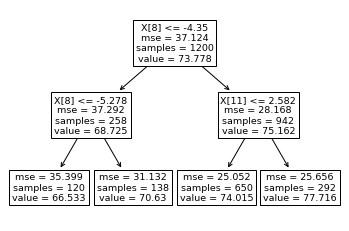

In [95]:
tree.plot_tree(regr_1) 

In [96]:
print(features[12])
#print(features[9])
print(features[0])

Avanzamento e dribbling aggressivo/superfluo
Incisività offensiva


In [97]:
# Predict
y_1 = regr_1.predict(x_test)
y_2 = regr_2.predict(x_test)
y_3 = regr_3.predict(x_test)
y_4 = regr_4.predict(x_test)
y_5 = regr_5.predict(x_test)

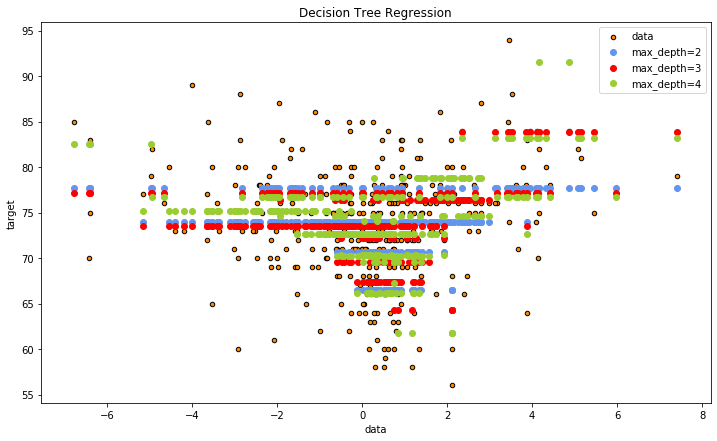

In [98]:
# Plot the results
n_feature = 12
plt.figure(figsize=(12,7))
plt.scatter(x_test[:,n_feature], y_test, s=20, edgecolor="black", c="darkorange", label="data")
plt.scatter(x_test[:,n_feature], y_1, color="cornflowerblue", label="max_depth=2")#, linewidth=2)
plt.scatter(x_test[:,n_feature], y_2, color="red", label="max_depth=3")#, linewidth=2)
plt.scatter(x_test[:,n_feature], y_3, color="yellowgreen", label="max_depth=4") #, linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

In [99]:
# score
score1 = regr_1.score(x_test,y_test)
print(score1)
score2 = regr_2.score(x_test,y_test)
print(score2)
score3 = regr_3.score(x_test,y_test)
print(score3)
score4 = regr_4.score(x_test,y_test)
print(score4)
score5 = regr_5.score(x_test,y_test)
print(score5)

0.25574919309006383
0.2815498615257437
0.2480777345802442
0.23269177516768003
0.16407272487152627


# ADABOOST

In [100]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

x = df.loc[:, features].values
y = df.loc[:, 'Overall_index'].values
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
x_train = x[:1200]
y_train = y[:1200]
x_test = x[1200:]
y_test = y[1200:]

#base_estimator : object, default=None
#  If None, then the base estimator is DecisionTreeRegressor(max_depth=3).

# Fit regression model
regr_1 = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=1), learning_rate=0.1, random_state=0)
regr_2 = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=3), learning_rate=0.1, random_state=0)
regr_3 = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=5), learning_rate=0.1, random_state=0)
regr_4 = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=6), learning_rate=0.1, random_state=0)
regr_5 = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=7), learning_rate=0.1, random_state=0)
regr_1.fit(x_train,y_train)
regr_2.fit(x_train,y_train)
regr_3.fit(x_train,y_train)
regr_4.fit(x_train,y_train)
regr_5.fit(x_train,y_train)

# Predict
y_1 = regr_1.predict(x_test)
y_2 = regr_2.predict(x_test)
y_3 = regr_3.predict(x_test)
y_4 = regr_4.predict(x_test)
y_5 = regr_5.predict(x_test)

# score
score1 = regr_1.score(x_test,y_test)
print(score1)
score2 = regr_2.score(x_test,y_test)
print(score2)
score3 = regr_3.score(x_test,y_test)
print(score3)
score4 = regr_4.score(x_test,y_test)
print(score4)
score5 = regr_5.score(x_test,y_test)
print(score5)

0.19665358560124035
0.32580560799284564
0.33325763173918
0.3506586093846827
0.36321081534971034


In [101]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'base_estimator': [DecisionTreeRegressor(max_depth=i) for i in range(1,14)],
    'learning_rate': [0.01,0.05,0.1,0.3,0.5,0.7,1,1.5,2]
}

#DTR = DecisionTreeRegressor(max_depth=1)
ABR = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=1), learning_rate=0.01, random_state=0)
# run grid search
grid_search_ABR = GridSearchCV(ABR, param_grid=param_grid, cv=5, return_train_score=False)#, scoring = 'roc_auc')

#CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
grid_search_ABR.fit(x,y)
print(grid_search_ABR.cv_results_)

{'mean_fit_time': array([0.10805788, 0.10523043, 0.11342835, 0.09433932, 0.07045388,
       0.05562224, 0.03930416, 0.032903  , 0.02273116, 0.17429509,
       0.17135105, 0.16342607, 0.14414907, 0.13875403, 0.13843579,
       0.11262522, 0.09196062, 0.10239305, 0.20854883, 0.22551575,
       0.2027513 , 0.19564509, 0.16952333, 0.16753163, 0.14535174,
       0.13321719, 0.13230777, 0.25388107, 0.27641349, 0.26742291,
       0.23113637, 0.21564703, 0.1905385 , 0.18773465, 0.16696887,
       0.16374102, 0.29897928, 0.3035337 , 0.31828594, 0.28578672,
       0.24712944, 0.25864615, 0.2405972 , 0.20672593, 0.19695444,
       0.35408025, 0.34646173, 0.34332528, 0.31681142, 0.3016418 ,
       0.29391513, 0.26236219, 0.27890081, 0.25285254, 0.39420242,
       0.39277997, 0.37993107, 0.35497909, 0.34680119, 0.33705459,
       0.34170041, 0.31538253, 0.29708652, 0.43042617, 0.42475595,
       0.43697286, 0.42117033, 0.39065733, 0.37865286, 0.3926116 ,
       0.3635674 , 0.31268559, 0.468153  , 0

In [102]:
print(grid_search_ABR.best_estimator_)
print(grid_search_ABR.best_score_)
print(grid_search_ABR.best_params_)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse',
                                                       max_depth=9,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       presort=False,
                                                       random_state=None,
                                                       splitter='best'),
                  learning_rate=1.5, loss='linear', n_estimators=50,
                  random_s